In [2]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

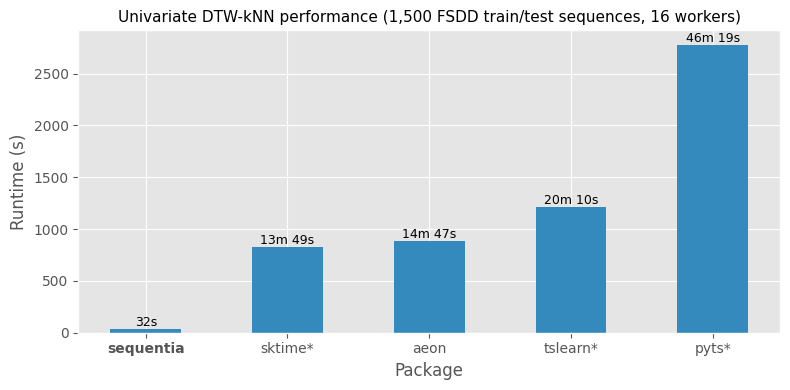

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

runtimes = [31.871, 828.855, 887.367, 1210.012, 2778.706]
labels = ["sequentia", "sktime*", "aeon", "tslearn*", "pyts*"]

bars = ax.bar(labels, runtimes, width=0.5, color="C1")
ax.set(xlabel="Package", ylabel="Runtime (s)")
ax.set_title(
    (
        "Univariate DTW-kNN performance "
        "(1,500 FSDD train/test sequences, 16 workers)"
    ),
    fontsize=11,
)


def fmt(s: float) -> str:
    """Formats the runtime."""
    if s < 60:
        return f"{round(s)}s"
    m, s = divmod(s, 60)
    return f"{round(m)}m {round(s)}s"


for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        fmt(bar.get_height()),
        ha="center",
        va="bottom",
        fontsize=9,
    )

for lab in ax.get_xticklabels():
    if lab.get_text() == "sequentia":
        lab.set_fontweight("bold")

plt.tight_layout()
plt.savefig("benchmark.svg")
plt.show()